---

<div align="center">

# 🐾 **Felis Taxonomy Classification | InceptionV3** 🐾  
### *Course Project - Deep Learning*

</div>

---

#### **`Part II | Fine Tuning`**

| **Author**        | Shagun                                          |
|--------------------|------------------------------------------------|
| **School**        | School of Computing & Data Science, Sai University |
| **Email ID**      | shagun.s-26@scds.saiuniversity.edu.in          |
| **Date Created**  | 26/12/2024                                     |

---

### **🔍 Project Overview**

- **Problem**: `Image Classification`
- **Dataset**: `Felis Taxonomy`
- **Model**: `InceptionV3`
- **Key Library Used**: `TensorFlow Keras`

---

### **📄 Description**

This section focuses on **Fine Tuning** to further improve the classification of **Felis (cat) images** into **7 types**, leveraging the pre-trained **InceptionV3 model**. Fine-tuning involves unfreezing certain layers of the feature extractor to allow specialized learning for the given dataset.

---

<div align="center">

✨ Happy Coding! ✨

</div>


## Downloading and preparing the data

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.17.1


In [2]:
import os
import glob
import PIL
from PIL import Image

In [3]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')

# from drive
imgFiles = glob.glob("/content/drive/MyDrive/Felis_Taxonomy/*/*.jpg")


Mounted at /content/drive


In [4]:
print(len(imgFiles))

519


In [5]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (10).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (1).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (18).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (26).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (24).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (20).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (2).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (27).jpg


In [6]:
# Since the model and datasets are already prepared, load them directly from Drive
# load numpy array from npy file
from numpy import load
X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')
print(f"No. of training samples: {X_train_std.shape[0]}")
print(f"No. of testing samples: {X_test_std.shape[0]}")

No. of training samples: 389
No. of testing samples: 130


In [7]:
import os
print(os.listdir('/content/drive/MyDrive/Models'))


['InceptionV3_FineTuning_BestModel.keras', 'DenseNet121_TransferLearning_BestModel.keras', 'DenseNet121_FineLearning_BestModel.keras', 'EfficientNetV2_TransferLearning_BestModel.keras', 'EfficientNetV2_FineTuning_BestModel.keras', 'InceptionV3_TransferLearning_BestModel.keras', 'X_train_std.npy', 'X_test_std.npy', 'y_test.npy', 'y_train.npy']


In [8]:
import os
file_path = '/content/drive/MyDrive/Models/InceptionV3_TransferLearning_BestModel.keras'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File exists


In [9]:
# Load the model saved in the native Keras format
model1_FT = keras.models.load_model(file_path)
model1_FT.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, None, None, 32) │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, None, None, 32) │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, None, None, 32) │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, None, None, 32) │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, None, None, 32) │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, None, None, 32) │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, None, None, 64) │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, None, None, 64) │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, None, None, 64) │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, None, None, 64) │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, None, None, 80) │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, None, None, 80) │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, None, None, 80) │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 21,862,199 (83.40 MB)

 Trainable params: 18,439 (72.03 KB)

 Non-trainable params: 21,806,880 (83.19 MB)

 Optimizer params: 36,880 (144.07 KB)

## Fine Tuning the model
In this Fine Tuning experiment, we freeze the initial 25% of the Feature Extractor's layers so that they are not updated during backpropagation

In [10]:
# NOTE: Last 4 layers of the model belong to classifier
train_threshold = int(0.25*(len(model1_FT.layers)-4))

for layer in model1_FT.layers[:train_threshold]:
    layer.trainable = False

for layer in model1_FT.layers[train_threshold:]:
    layer.trainable = True

## Compiling and training the model

In [11]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [
             keras.callbacks.ModelCheckpoint("bestTL.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_FT = model1_FT.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_FT)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.4518 - loss: 3.0801 - val_accuracy: 0.1026 - val_loss: 77.2593
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.5389 - loss: 1.5551 - val_accuracy: 0.1282 - val_loss: 937.9785
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8047 - loss: 0.6786 - val_accuracy: 0.1538 - val_loss: 18.9906
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.8854 - loss: 0.3295 - val_accuracy: 0.2308 - val_loss: 2.6794
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.9334 - loss: 0.3085 - val_accuracy: 0.4103 - val_loss: 2.0550
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9503 - loss: 0.1616 - val_accuracy: 0.4359 - val_loss: 4.5182
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9556 - loss: 0.2173 - val_accuracy: 0.3333 - val_loss: 5.4509
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9732 - loss: 0.0792 - val_accura

## Visualising the model's training accuracy

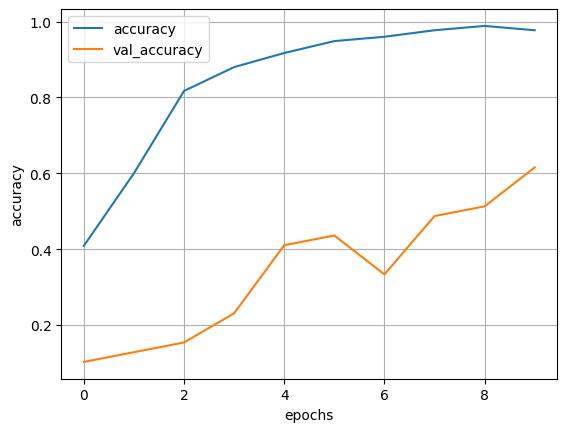

In [12]:
progress = {k:v for k,v in history_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [13]:
# Loading the model's best weights during training
model1_FT.load_weights("bestTL.weights.h5")

# Test loss and test accuracy
testLoss_FT, testAccuracy_FT = model1_FT.evaluate(x = X_test_std, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 891ms/step - accuracy: 0.6705 - loss: 0.9841
Test-loss: 1.001946, Test-accuracy: 0.630769


In [14]:
# Making predictions on the test set

y_proba = model1_FT.predict(X_test_std)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
[0 3 4 4 0 1 1 5 3 1 4 4 6 1 3 1 6 0 3 4 3 3 1 6 0 1 6 5 0 4 1 1 6 4 3 1 3
 4 4 3 1 1 1 4 5 0 3 4 3 5 3 3 4 3 5 3 5 4 5 3 3 0 3 2 5 6 3 6 1 1 3 3 0 4
 3 0 0 3 3 6 0 1 3 5 1 3 6 3 5 3 6 2 5 3 6 6 0 6 3 5 5 5 1 3 1 1 4 3 3 1 5
 5 6 4 0 4 0 5 6 3 6 6 3 2 1 6 0 4 5 6]


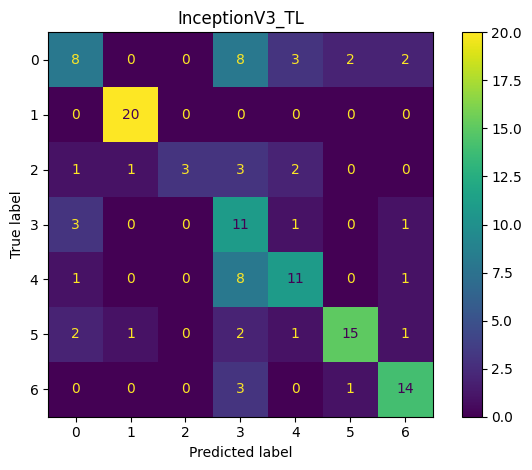

In [15]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("InceptionV3_TL")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_InceptionV3_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()



In [16]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        23
           1       0.91      1.00      0.95        20
           2       1.00      0.30      0.46        10
           3       0.31      0.69      0.43        16
           4       0.61      0.52      0.56        21
           5       0.83      0.68      0.75        22
           6       0.74      0.78      0.76        18

    accuracy                           0.63       130
   macro avg       0.71      0.62      0.62       130
weighted avg       0.69      0.63      0.63       130



In [17]:
# Save the model in the native Keras format
model1_FT.save('/content/drive/MyDrive/Models/InceptionV3_FineTuning_BestModel.keras')
